In [1]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# Step 2: Load and inspect the dataset
file_path = '/content/spam_mail.csv'  # Replace with your file path
data = pd.read_csv(file_path)

In [4]:
# Display the first few rows to understand the structure of the data
print(data.head())

  Category                                           Masseges
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Masseges  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [6]:
# Step 3: Preprocess the dataset
## 3.1 Rename columns for consistency
data.rename(columns={'Category': 'Label', 'Masseges': 'Message'}, inplace=True)

In [10]:
## 3.2 Encode the 'Label' column (1 for spam, 0 for ham)
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])

In [12]:
## 3.3 Clean the text data (convert to lowercase and remove punctuation)
data['Message'] = data['Message'].str.lower().str.replace(r'[^\w\s]', '', regex=True)

In [13]:
# Display the cleaned dataset
print(data.head())

   Label                                            Message
0      0  go until jurong point crazy available only in ...
1      0                            ok lar joking wif u oni
2      1  free entry in 2 a wkly comp to win fa cup fina...
3      0        u dun say so early hor u c already then say
4      0  nah i dont think he goes to usf he lives aroun...


In [14]:
# Step 4: Split the dataset into training and testing sets
X = data['Message']
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

Training set size: (4457,), Test set size: (1115,)


In [15]:
# Step 5: Convert text data to numerical form using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [16]:
# Step 6: Train the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_tfidf, y_train)

LogisticRegression(random_state=42)

In [17]:

# Step 7: Evaluate the model
## 7.1 Make predictions on the test set
y_pred = log_reg.predict(X_test_tfidf)

In [18]:
## 7.2 Calculate accuracy and generate classification report
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

In [19]:
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report_result)


Accuracy: 96.95%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



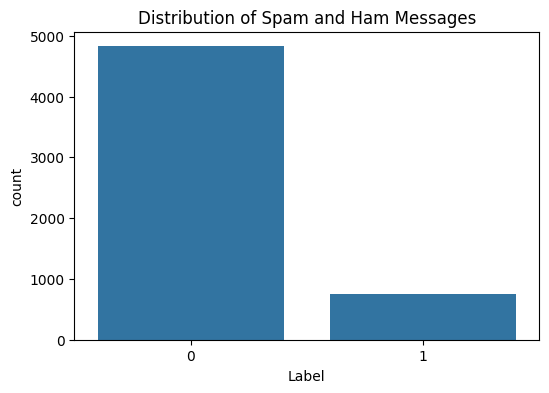

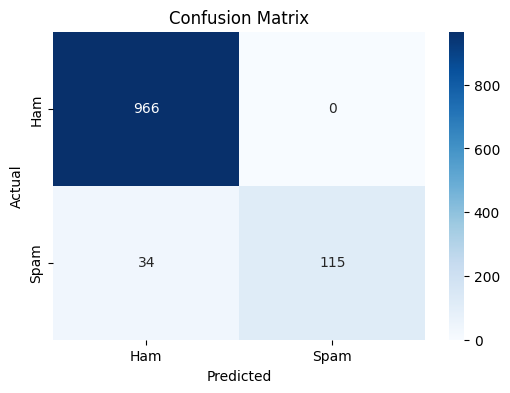

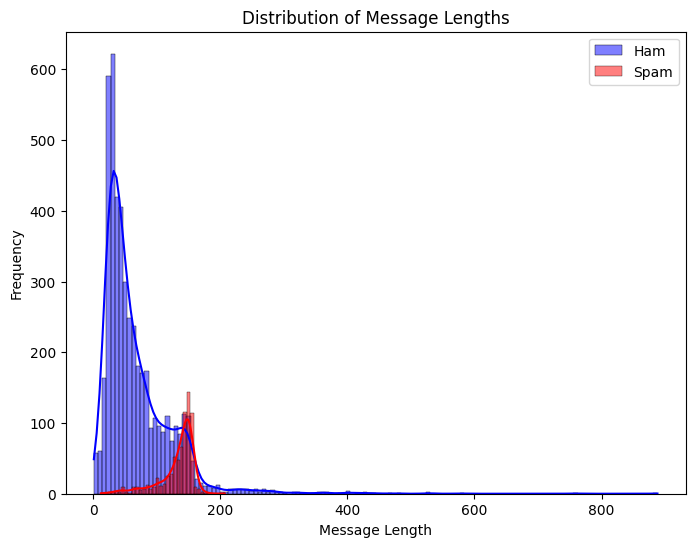

In [20]:
# prompt: Please perform visualization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# ... (Your existing code) ...

# Step 8: Visualization

# 8.1 Label Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Label', data=data)
plt.title('Distribution of Spam and Ham Messages')
plt.show()


# 8.2 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# 8.3  Message Length Analysis (optional -  requires adding a message length column)
data['Message_Length'] = data['Message'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(data[data['Label'] == 0]['Message_Length'], color='blue', label='Ham', kde=True)
sns.histplot(data[data['Label'] == 1]['Message_Length'], color='red', label='Spam', kde=True)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

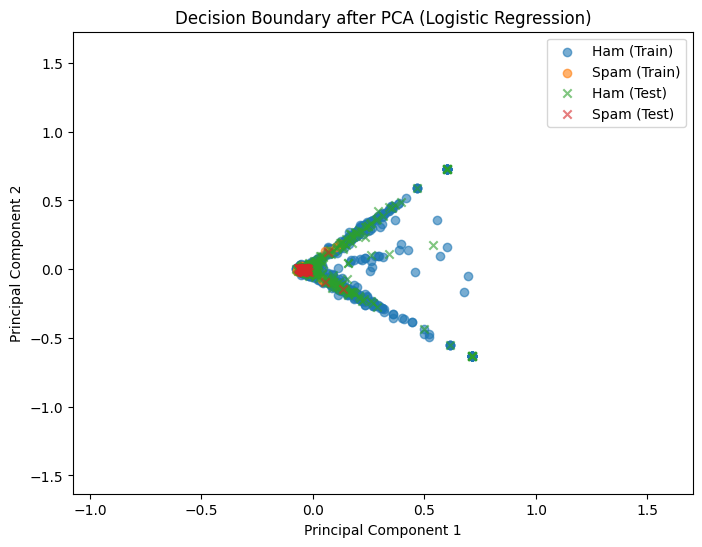

In [30]:
# prompt: where is the logistic regression line

# ... (Your existing code) ...

# Step 8: Visualization (continued)

# The logistic regression model itself doesn't have a visually represented "line" in the traditional sense
# because it operates in a high-dimensional space created by TF-IDF vectorization.
# However, you can visualize the decision boundary in 2D if you reduce the data to 2 dimensions
# using PCA or another dimensionality reduction technique.

from sklearn.decomposition import PCA

# Reduce data to 2 dimensions for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())


# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[y_train==0, 0], X_train_pca[y_train==0, 1], label='Ham (Train)', alpha=0.6)
plt.scatter(X_train_pca[y_train==1, 0], X_train_pca[y_train==1, 1], label='Spam (Train)', alpha=0.6)
plt.scatter(X_test_pca[y_test==0, 0], X_test_pca[y_test==0, 1], label='Ham (Test)', alpha=0.6, marker='x')
plt.scatter(X_test_pca[y_test==1, 0], X_test_pca[y_test==1, 1], label='Spam (Test)', alpha=0.6, marker='x')

# Create meshgrid for plotting the decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict on the meshgrid
Z = log_reg.predict(vectorizer.transform([' '.join(map(str, x)) for x in np.c_[xx.ravel(), yy.ravel()]])) #need to convert back to text form
Z = Z.reshape(xx.shape)


# Plot the decision boundary
plt.contour(xx, yy, Z, colors='k', linestyles='--', levels=[0.5]) #plot the decision boundary

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary after PCA (Logistic Regression)')
plt.legend()
plt.show()

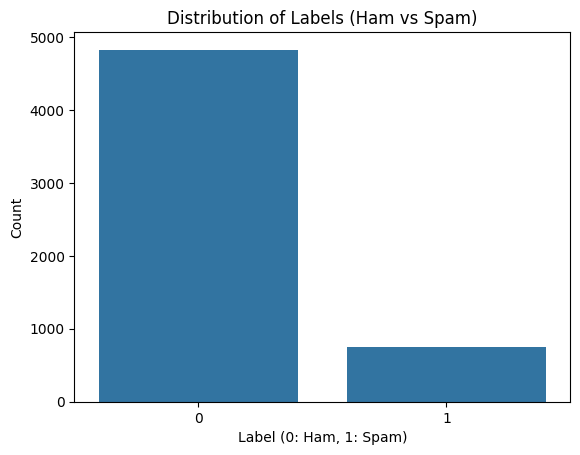

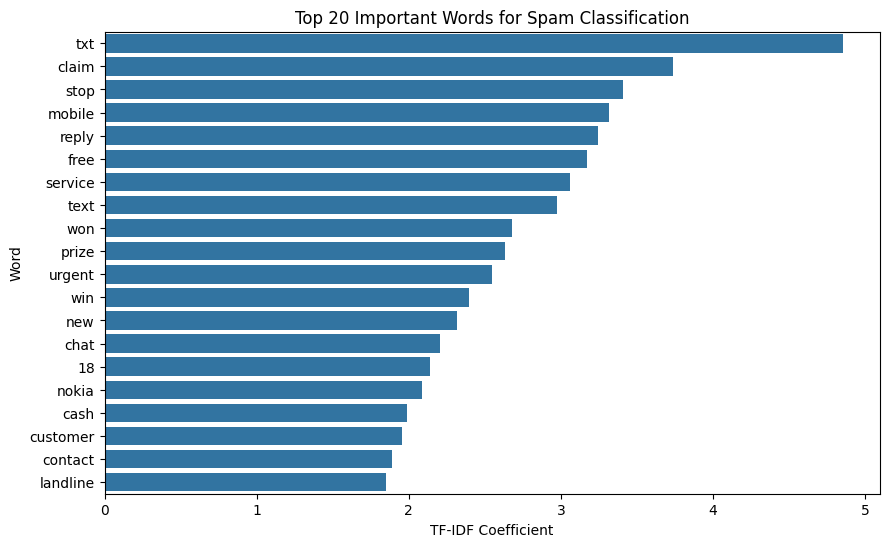

In [22]:
# Step 8: Visualization
## 8.1 Visualize the distribution of labels
sns.countplot(x='Label', data=data)
plt.title('Distribution of Labels (Ham vs Spam)')
plt.xlabel('Label (0: Ham, 1: Spam)')
plt.ylabel('Count')
plt.show()

## 8.2 Visualize the most important words using TF-IDF scores
feature_names = vectorizer.get_feature_names_out()
coefficients = log_reg.coef_.flatten()
important_words = pd.DataFrame({
    'Word': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Word', data=important_words)
plt.title('Top 20 Important Words for Spam Classification')
plt.xlabel('TF-IDF Coefficient')
plt.ylabel('Word')
plt.show()


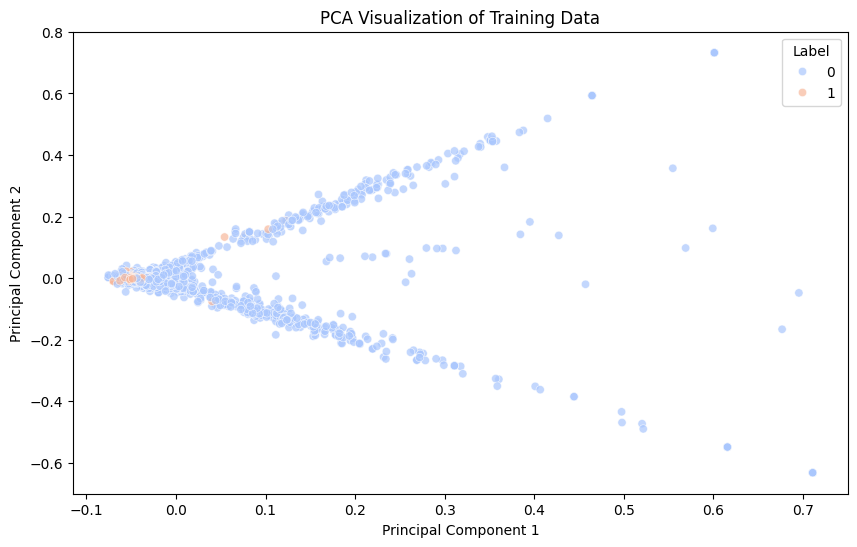

In [23]:
## 8.3 Visualize decision boundary using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='coolwarm', alpha=0.7)
plt.title('PCA Visualization of Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Label')
plt.show()

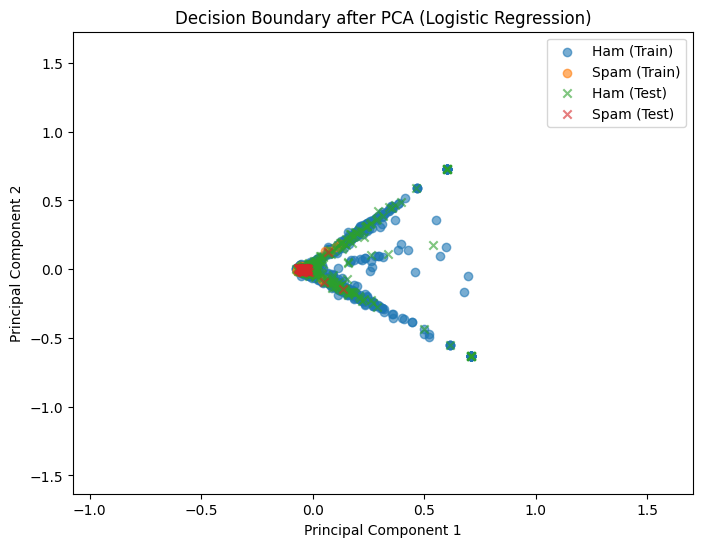

In [29]:

# Reduce data to 2 dimensions for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())


# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[y_train==0, 0], X_train_pca[y_train==0, 1], label='Ham (Train)', alpha=0.6)
plt.scatter(X_train_pca[y_train==1, 0], X_train_pca[y_train==1, 1], label='Spam (Train)', alpha=0.6)
plt.scatter(X_test_pca[y_test==0, 0], X_test_pca[y_test==0, 1], label='Ham (Test)', alpha=0.6, marker='x')
plt.scatter(X_test_pca[y_test==1, 0], X_test_pca[y_test==1, 1], label='Spam (Test)', alpha=0.6, marker='x')

# Create meshgrid for plotting the decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict on the meshgrid
Z = log_reg.predict(vectorizer.transform([' '.join(map(str, x)) for x in np.c_[xx.ravel(), yy.ravel()]])) #need to convert back to text form
Z = Z.reshape(xx.shape)


# Plot the decision boundary
plt.contour(xx, yy, Z, colors='k', linestyles='--', levels=[0.5]) #plot the decision boundary

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary after PCA (Logistic Regression)')
plt.legend()
plt.show()